<a href="https://colab.research.google.com/github/dzeko5959/AI/blob/main/ML/UDEM/A1_5_Seunghyeon_Lee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import the CSV file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving A1.5 Calificaciones.csv to A1.5 Calificaciones.csv


In [ ]:
import pandas as pd

df = pd.read_csv("A1.5 Calificaciones.csv")

**2. Categorical variables transforming**

*   Converting categorical variables, Escuela, Ceso, and the Internet, into numbers
*   Transforming HorasDeEstudio, which appears to be a number but is actually a categorical variable, into a dummy variable
*   Removing unnecessary dummy variables to avoid dummy variable traps

In [ ]:
df = pd.get_dummies(df, columns=["Escuela", "Sexo", "Internet", "HorasDeEstudio"], drop_first=True)

print(df.head())

   Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
0    18           0       6   5   6   6       False   False         False   
1    17           0       4   5   5   6       False   False          True   
2    15           3      10   7   8  10       False   False          True   
3    15           0       2  15  14  15       False   False          True   
4    16           0       4   6  10  10       False   False         False   

   HorasDeEstudio_2  HorasDeEstudio_3  HorasDeEstudio_4  
0              True             False             False  
1              True             False             False  
2              True             False             False  
3             False              True             False  
4              True             False             False  


If one side of a categorical variable is true, the other side is false

**3. Outlier detection**

Outlier : Values that are too large or too small compared to other values

In [ ]:
import numpy as np

Q1 = df["Faltas"].quantile(0.25)
Q3 = df["Faltas"].quantile(0.75)
IQR = Q3 - Q1

*   Q1 (1 quartile, 25%) : the bottom 25% point of the data
*   Q3 (3rd quartile, 75%) : Top 75% points in the data
*   IQR (Interquartile Range) = Q3 - Q1

In [ ]:
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# outlier detection
outliers = df[(df["Faltas"] < lower_bound) | (df["Faltas"] > upper_bound)]
print(outliers)

# outlier elimination
df = df[(df["Faltas"] >= lower_bound) & (df["Faltas"] <= upper_bound)]

**4. Multicollinearity analysis**

*   Multicollinearity is analyzed by checking the correlation between G1, G2, and G3 variables.
*   Deciding whether to remove variables with high multicollinearity
*   If G1 and G2 have a strong correlation with G3, it may be good to put both in or remove one.

*   Red (positive correlation, close to +1) → increasing
*   Blue (negative correlation, close to -1) → One increases and one decreases
*   White or gray (near to zero) → little correlation

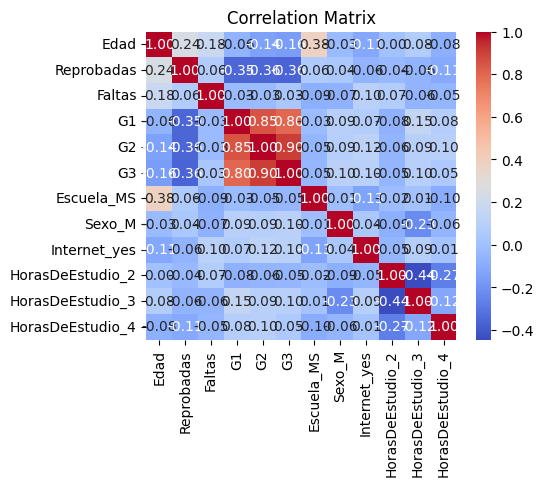

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation calculation
corr_matrix = df.corr()

# Heatmap visualization
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

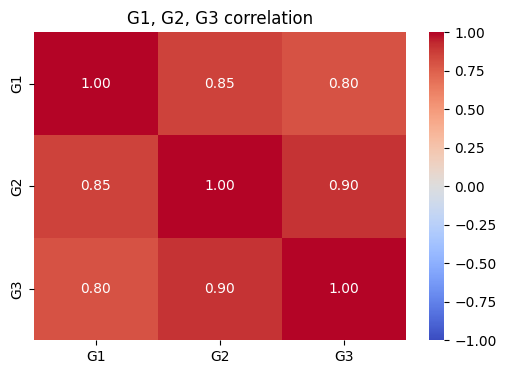

In [ ]:
df_2 = pd.read_csv("A1.5 Calificaciones.csv")
g_scores_extra = df_2[["G1", "G2", "G3"]]

corr_matrix = g_scores_extra.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("G1, G2, G3 correlation", fontsize=12)
plt.show()

**5. Add interaction between variables**

I selected G1 and G2 because they have shown high correlation at he heatmap

In [ ]:
df["G2_G1"] = df["G1"] * df["G2"]

print(df.head())

   Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
0    18           0       6   5   6   6       False   False         False   
1    17           0       4   5   5   6       False   False          True   
2    15           3      10   7   8  10       False   False          True   
3    15           0       2  15  14  15       False   False          True   
4    16           0       4   6  10  10       False   False         False   

   HorasDeEstudio_2  HorasDeEstudio_3  HorasDeEstudio_4  G2_G1  
0              True             False             False     30  
1              True             False             False     25  
2              True             False             False     56  
3             False              True             False    210  
4              True             False             False     60  


**6. Training and evaluating multiple regression models**

Regression coefficient : [-0.19197022 -0.38165505  0.04739605  0.19489372  1.00081851  0.08049845
  0.28892898 -0.26389518 -0.09405344  0.06808882 -0.04388502 -0.00330058]
Model intercept : 1.1316519518967318
Mean Squared Error: 4.462348697748655


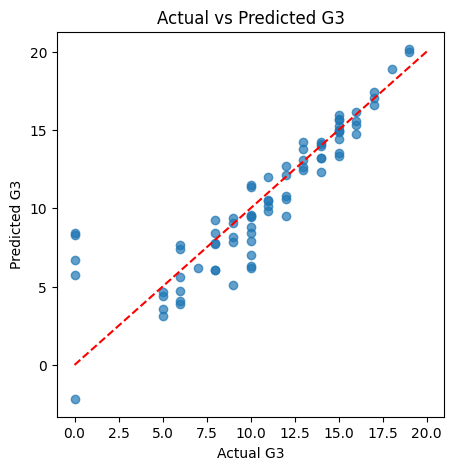

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = df.drop(columns=["G3"])  # G3 : dependent variable
y = df["G3"]

# Separation of training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression model training
model = LinearRegression()
model.fit(X_train, y_train)

# Regression coefficient
print("Regression coefficient :", model.coef_)
print("Model intercept :", model.intercept_)

# Prediction values
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted G3")
plt.plot([0, 20], [0, 20], color="red", linestyle="--")
plt.show()

**Conclusion : In the graph, the predicted and actual values are gathered in a 45-degree straight line, so it is considered a relatively good model**